In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from utils_dump_load import load_from_pickle, dump_to_pickle

<h1> Loading data from pickle

In [2]:
filename = "data/data.pkl"
content = load_from_pickle(filename)

In [3]:
X_train = content["X_train"]
X_test = content["X_test"]
X_train_scaled = content["X_train_scaled"]
X_test_scaled = content["X_test_scaled"]
X_train_usamp = content["X_train_usamp"]
X_train_osamp = content["X_train_osamp"]
y_train_usamp = content["y_train_usamp"]
y_train_osamp = content["y_train_osamp"]
y_train = content["y_train"]
y_test = content["y_test"]

<h1> Supervised Classification Model

In [4]:
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score, f1_score, classification_report

<h2> Logistic Regression

In [5]:
from sklearn.linear_model import LogisticRegression

<h3> Raw data

In [6]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_score_lr = lr.predict_proba(X_test_scaled)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr[:,1])
roc_auc = auc(fpr_lr, tpr_lr)
roc_auc

/home/zyncus/bin/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.973907005031907

In [7]:
y_pred = np.round(y_score_lr[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

105 transactions classified as fraudulent out of 155


<h3> Undersampling

In [8]:
lr = LogisticRegression()
lr.fit(X_train_usamp, y_train_usamp)
y_score_lr_u = lr.predict_proba(X_test_scaled)
fpr_lr_u, tpr_lr_u, _ = roc_curve(y_test, y_score_lr_u[:,1])
roc_auc = auc(fpr_lr_u, tpr_lr_u)
roc_auc

/home/zyncus/bin/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9729143153671355

In [9]:
y_pred = np.round(y_score_lr_u[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

3221 transactions classified as fraudulent out of 155


<h3> Oversampling

In [10]:
lr = LogisticRegression()
lr.fit(X_train_osamp, y_train_osamp)
y_score_lr_o = lr.predict_proba(X_test_scaled)
fpr_lr_o, tpr_lr_o, _ = roc_curve(y_test, y_score_lr_o[:,1])
roc_auc = auc(fpr_lr_o, tpr_lr_o)
roc_auc

/home/zyncus/bin/anaconda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.978169337440354

In [11]:
y_pred = np.round(y_score_lr_o[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

2281 transactions classified as fraudulent out of 155


<h3> Comparison

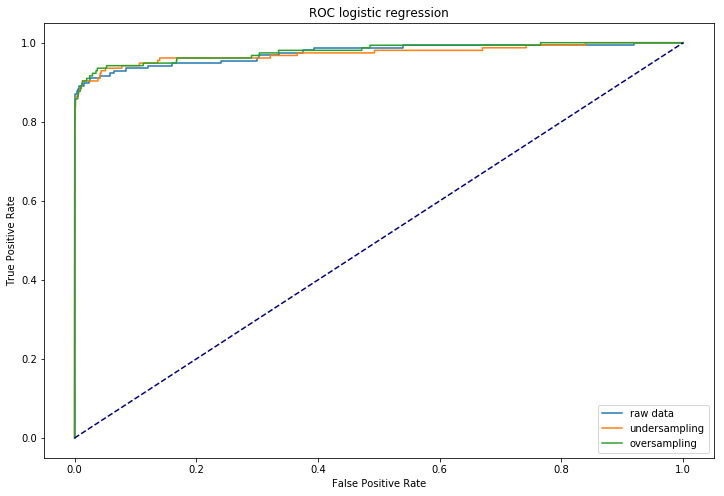

In [12]:
plt.figure(figsize=(12,8))

plt.plot(fpr_lr, tpr_lr, label='raw data')
plt.plot(fpr_lr_u, tpr_lr_u, label='undersampling')
plt.plot(fpr_lr_o, tpr_lr_o, label='oversampling')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC logistic regression')
plt.legend(loc="lower right")
plt.show()

-> Best Model: LR with Undersampling

In [13]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85288
           1       0.06      0.92      0.12       155

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



<h2> XG Boost

In [14]:
import xgboost as xgb

<h3> Raw data

In [15]:
xg = xgb.XGBClassifier()
xg.fit(X_train_scaled, y_train)
y_score_xg = xg.predict_proba(X_test_scaled)
fpr_xg, tpr_xg, _ = roc_curve(y_test, y_score_xg[:,1])
roc_auc = auc(fpr_xg, tpr_xg)
roc_auc

0.9805995851626822

In [16]:
y_pred = np.round(y_score_xg[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

131 transactions classified as fraudulent out of 155


<h3> Undersampling

In [17]:
xg = xgb.XGBClassifier()
xg.fit(X_train_usamp, y_train_usamp)
y_score_xg_u = xg.predict_proba(X_test_scaled)
fpr_xg_u, tpr_xg_u, _ = roc_curve(y_test, y_score_xg_u[:,1])
roc_auc = auc(fpr_xg_u, tpr_xg_u)
roc_auc

0.9810578805474279

In [18]:
y_pred = np.round(y_score_xg_u[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

2787 transactions classified as fraudulent out of 155


<h3> Oversampling

In [19]:
xg = xgb.XGBClassifier()
xg.fit(X_train_osamp, y_train_osamp)
y_score_xg_o = xg.predict_proba(X_test_scaled)
fpr_xg_o, tpr_xg_o, _ = roc_curve(y_test, y_score_xg_o[:,1])
roc_auc = auc(fpr_xg_o, tpr_xg_o)
roc_auc

0.9787845962522428

In [20]:
y_pred = np.round(y_score_xg_o[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

1122 transactions classified as fraudulent out of 155


<h3> Comparison

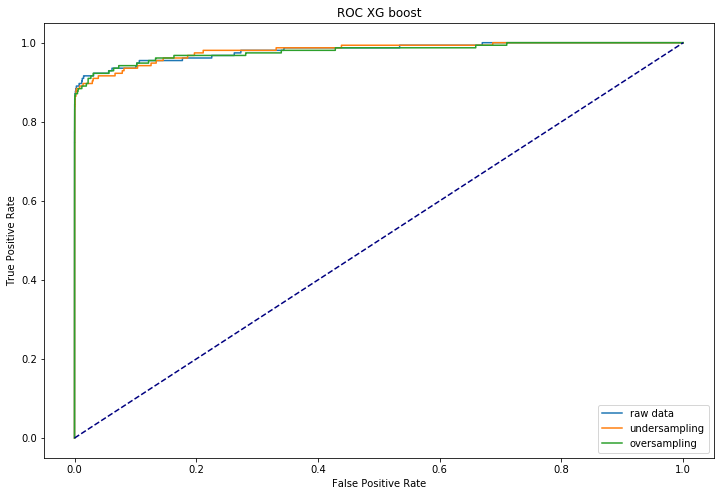

In [21]:
plt.figure(figsize=(12,8))

plt.plot(fpr_xg, tpr_xg, label='raw data')
plt.plot(fpr_xg_u, tpr_xg_u, label='undersampling')
plt.plot(fpr_xg_o, tpr_xg_o, label='oversampling')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC XG boost')
plt.legend(loc="lower right")
plt.show()

-> Best Model: LR with Raw data

<h2> LGBM

In [22]:
import lightgbm as lgb

<h3> Raw data

In [23]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train_scaled, y_train)
y_score_lg = lgbm.predict_proba(X_test_scaled)
fpr_lg, tpr_lg, _ = roc_curve(y_test, y_score_lg[:,1])
roc_auc = auc(fpr_lg, tpr_lg)
roc_auc

0.6412328172325419

In [24]:
y_pred = np.round(y_score_lg[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

713 transactions classified as fraudulent out of 155


<h3> Undersampling

In [25]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train_usamp, y_train_usamp)
y_score_lg_u = lgbm.predict_proba(X_test_scaled)
fpr_lg_u, tpr_lg_u, _ = roc_curve(y_test, y_score_lg_u[:,1])
roc_auc = auc(fpr_lg_u, tpr_lg_u)
roc_auc

0.9795477789107722

In [26]:
y_pred = np.round(y_score_lg_u[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

2345 transactions classified as fraudulent out of 155


<h3> Oversampling

In [27]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train_osamp, y_train_osamp)
y_score_lg_o = lgbm.predict_proba(X_test_scaled)
fpr_lg_o, tpr_lg_o, _ = roc_curve(y_test, y_score_lg_o[:,1])
roc_auc = auc(fpr_lg_o, tpr_lg_o)
roc_auc

0.978396159048204

In [28]:
y_pred = np.round(y_score_lg_o[:,1], 0)
print(int(y_pred.sum()), "transactions classified as fraudulent out of", y_test.sum())

276 transactions classified as fraudulent out of 155


<h3> Comparison

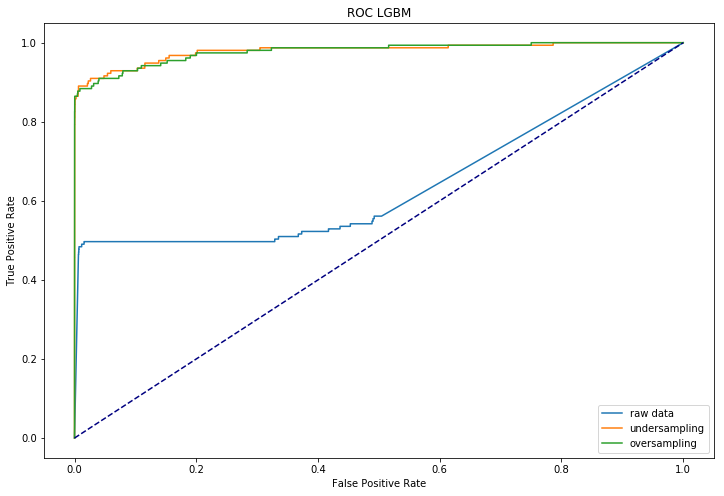

In [29]:
plt.figure(figsize=(12,8))

plt.plot(fpr_lg, tpr_lg, label='raw data')
plt.plot(fpr_lg_u, tpr_lg_u, label='undersampling')
plt.plot(fpr_lg_o, tpr_lg_o, label='oversampling')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC LGBM')
plt.legend(loc="lower right")
plt.show()

-> Best Model: LR with Oversampling

<h1> Anomaly detection model (Unsupervised)

- Ratio of Class 1 in y: 0.17 %
- Ratio of Class 1 in y_undersamp: 0.99 %
- Ratio of Class 1 in y_oversamp: 0.99 %

In [30]:
X_train_inliers = X_train_scaled[y_train==0]
X_train_inliers.shape

(199027, 32)

In [31]:
X_test_scaled.shape

(85443, 32)

<h2> Gaussian distribution based

In [32]:
from sklearn.covariance import EllipticEnvelope

In [33]:
G = EllipticEnvelope(random_state=0)

In [34]:
G.fit(X_train_inliers)
y_predG = G.predict(X_test_scaled)

/home/zyncus/bin/anaconda/lib/python3.7/site-packages/sklearn/covariance/robust_covariance.py:646: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "


In [35]:
#y_predG = G.fit_predict(X_test)

In [36]:
# predict returns 1 for an inlier and -1 for an outlier
y_predG[y_predG == 1] = 0
y_predG[y_predG == -1] = 1

In [37]:
print(classification_report(y_test, y_predG))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     85288
           1       0.02      0.87      0.03       155

   micro avg       0.91      0.91      0.91     85443
   macro avg       0.51      0.89      0.49     85443
weighted avg       1.00      0.91      0.95     85443



In [38]:
print(y_predG.sum(), "transactions classified as fraudulent out of", y_test.sum())

7935 transactions classified as fraudulent out of 155


In [39]:
y_score_g = -G.score_samples(X_test_scaled)
fpr_G, tpr_G, _ = roc_curve(y_test, y_score_g)
roc_auc = auc(fpr_G, tpr_G)
roc_auc

0.921240442251075

<h2> Isolation Forest

In [44]:
from sklearn.ensemble import IsolationForest

In [45]:
IF = IsolationForest(n_estimators=100, contamination="auto", behaviour="new", random_state=0)
IF.fit(X_train_inliers)
y_predIF = IF.predict(X_test_scaled)

In [46]:
#y_predIF = IF.fit_predict(X_test)

In [47]:
y_predIF[y_predIF == 1] = 0
y_predIF[y_predIF == -1] = 1

In [48]:
print(classification_report(y_test, y_predIF))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     85288
           1       0.05      0.81      0.09       155

   micro avg       0.97      0.97      0.97     85443
   macro avg       0.52      0.89      0.54     85443
weighted avg       1.00      0.97      0.98     85443



In [49]:
print(y_predIF.sum(), "transactions classified as fraudulent out of", y_test.sum())

2642 transactions classified as fraudulent out of 155


In [50]:
y_score_if = -IF.score_samples(X_test_scaled)
fpr_IF, tpr_IF, _ = roc_curve(y_test, y_score_if)
roc_auc = auc(fpr_IF, tpr_IF)
roc_auc

0.9507023640583254

<h2> Comparison

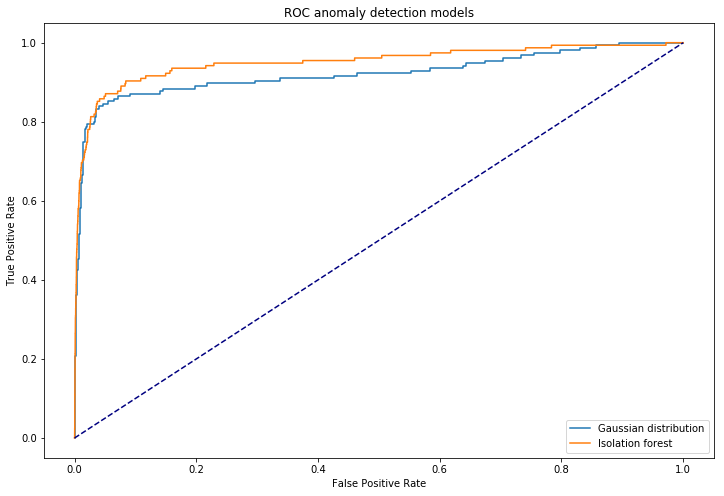

In [51]:
plt.figure(figsize=(12,8))

plt.plot(fpr_G, tpr_G, label='Gaussian distribution')
#plt.plot(fpr_LOF, tpr_LOF, label='Local Outlier Factor')
plt.plot(fpr_IF, tpr_IF, label='Isolation forest')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC anomaly detection models')
plt.legend(loc="lower right")
plt.show()

<h1> Comparison of both methods

<h2> ROC AUC

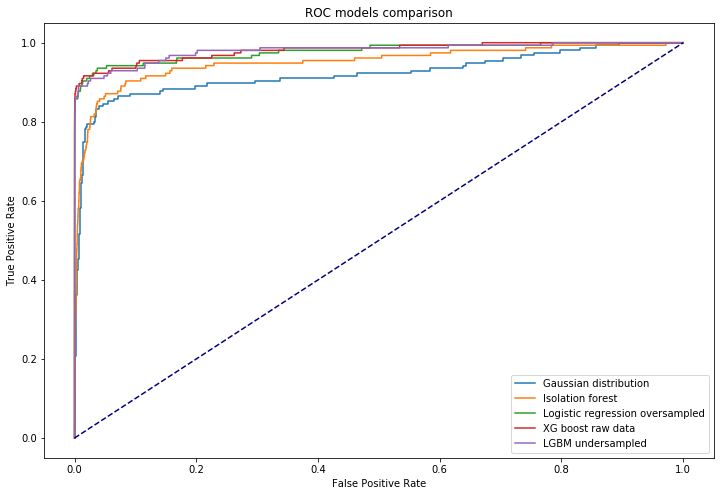

In [61]:
plt.figure(figsize=(12,8))

plt.plot(fpr_G, tpr_G, label='Gaussian distribution')
#plt.plot(fpr_LOF, tpr_LOF, label='Local Outlier Factor')
plt.plot(fpr_IF, tpr_IF, label='Isolation forest')
plt.plot(fpr_lr_o, tpr_lr_o, label='Logistic regression oversampled')
plt.plot(fpr_xg, tpr_xg, label='XG boost raw data')
plt.plot(fpr_lg_u, tpr_lg_u, label='LGBM undersampled')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC models comparison')
plt.legend(loc="lower right")
plt.show()

<h2> Recall / Precsion tradeoff

In [53]:
ytest = y_test.values.reshape(-1,1)

In [62]:
precision_lr_o , recall_lr_o, threshold_lr_o = precision_recall_curve(ytest, y_score_lr_o[:,1])
precision_xg , recall_xg, threshold_xg = precision_recall_curve(ytest, y_score_xg[:,1])
precision_lg_u , recall_lg_u, threshold_lg_u = precision_recall_curve(ytest, y_score_lg_u[:,1])

In [63]:
precision_g , recall_g, threshold_g = precision_recall_curve(ytest, y_score_g)
precision_if , recall_if, threshold_if = precision_recall_curve(ytest, y_score_if)

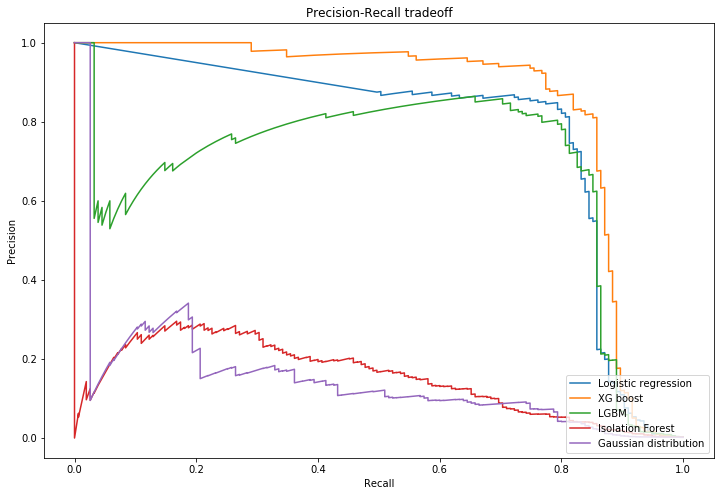

In [64]:
plt.figure(figsize=(12,8))
plt.plot(recall_lr_o, precision_lr_o, label="Logistic regression")
plt.plot(recall_xg, precision_xg, label="XG boost")
plt.plot(recall_lg_u, precision_lg_u, label="LGBM")
plt.plot(recall_if, precision_if, label="Isolation Forest")
plt.plot(recall_g, precision_g, label="Gaussian distribution")
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title("Precision-Recall tradeoff")
plt.legend(loc="lower right")
plt.show()

<h1> Dump into pickle

In [67]:
pickle_filename = "data/metrics.pkl"
content = {"lr": [y_score_lr_o, precision_lr_o, recall_lr_o, threshold_lr_o], 
           "xgboost": [y_score_xg, precision_xg, recall_xg, threshold_xg],
           "lgbm": [y_score_lg_u, precision_lg_u, recall_lg_u, threshold_lg_u], 
           "gauss": [y_score_g, precision_g, recall_g, threshold_g],
           "lof": [],#[y_score_lof, precision_lof, recall_lof, threshold_lof],
           "if": [y_score_if, precision_if, recall_if, threshold_if]}

In [68]:
dump_to_pickle(content, pickle_filename)